In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple">Definition of Linear Independence

If all $c$'s are zero, a set of vectors $\{v_1, v_2,...,v_p\}$ is said to be **linearly independent**, if the equation

$$c_{1} {v}_{1}+c_{2} {v}_{2}+\cdots+c_{p} {v}_{p}=\mathbf{0}$$

holds.

If any of $c_i\neq 0$, the set of vectors is linearly dependent.

## <font face="gotham" color="purple"> Example 1

Determine if ${v}_1, {v}_2, {v}_3$ are linearly independent.
$$
{v}_{1}=\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right]^T, 
{v}_{2}=\left[\begin{array}{l}
4 \\
5 \\
6
\end{array}\right]^T, \text { and } {v}_{3}=\left[\begin{array}{l}
2 \\
1 \\
0
\end{array}\right]^T
$$

The common way of testing linear combination is to construct augmented matrix and calculate the reduced form, for example

In [6]:
A = sy.Matrix([[1,4,2,0],
               [2,5,1,0],
               [3,6,0,0]])
print(A.rref())

(Matrix([
[1, 0, -2, 0],
[0, 1,  1, 0],
[0, 0,  0, 0]]), (0, 1))


The solution tells that $x_3$ is a free variable, so naturally it could be nonzero because $x_3\cdot 0 =0$, therefore the set is linearly dependent.

## <font face="gotham" color="purple"> Example 2

Consider a matrix $A$，determine if columns of $A$ are linearly independent.

$$
A=\left[\begin{array}{rrr}
0 & 1 & 4 \\
1 & 2 & -1 \\
5 & 8 & 0
\end{array}\right]
$$

Solve the system via augmented matrix.

In [3]:
A = sy.Matrix([[0,1,4,0],[1,2,-1,0],[5,8,0,0]])
print(A.rref())

⎛⎡1  0  0  0⎤           ⎞
⎜⎢          ⎥           ⎟
⎜⎢0  1  0  0⎥, (0, 1, 2)⎟
⎜⎢          ⎥           ⎟
⎝⎣0  0  1  0⎦           ⎠

$Ax=0$ has only trivial solution, i.e. $(c_1, c_2, c_3)^T = (0, 0, 0)$, so the columns of $A$ are linearly independent.

Linear independence is closly connected with linear combination, in next section we visualize the linear independence.

# <font face="gotham" color="purple"> Visualization of Linear Independence

This is a visual example in $\mathbb{R}^2$, showing $(3, 2)^T$, $(-9, -6)^T$, $(6, 4)^T$ are linearly dependent.

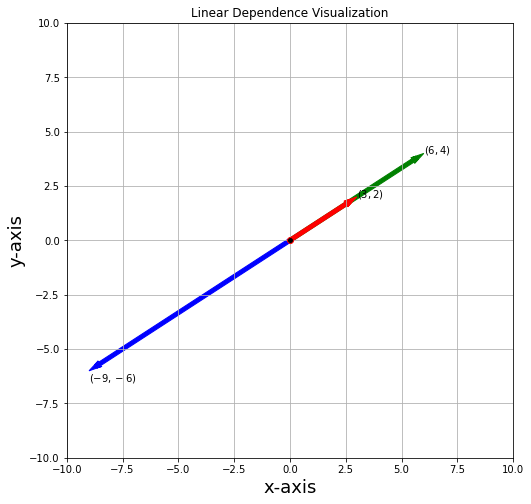

In [4]:
fig, ax = plt.subplots(figsize = (8, 8))
#######################Arrows#######################
arrows = np.array([[[0,0,3,2]],
                   [[0,0,-9,-6]], 
                   [[0,0,6,4]]])
colors = ['r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0],V[0], color = colors[i], width = .18, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4, zorder = -i)

ax.scatter(0, 0, ec = 'red', fc = 'black', zorder = 5)
ax.text(6, 4, '$(6, 4)$')
ax.text(-9, -6.5, '$(-9, -6)$')
ax.text(3, 2, '$(3, 2)$')

ax.grid(True)
ax.set_title('Linear Dependence Visualization')
ax.axis([-10, 10, -10, 10])
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
plt.show()

Simply put, _if one vector is the scalar multiple of the other vector, e.g. $3u = v$, these two vectors are linearly dependent_.

Next, we visualize linear independence in $\mathbb{R}^3$ with vectors $(1,-2,1)^T$, $(2,1,2)^T$, $(-1,2,3)^T$.

The standard procedure is to write down the span of first two vectors, which is a plane. Then we examine whether the third vector is in the plane. If not, this set of vectors is linearly independent.

$$
\left[
\begin{matrix}
x\\
y\\
z
\end{matrix}
\right]=
s\left[
\begin{matrix}
1\\
-2\\
1
\end{matrix}
\right]+
t\left[
\begin{matrix}
2\\
1\\
2
\end{matrix}
\right]=
\left[
\begin{matrix}
s+2t\\
-2s+t\\
s+2t
\end{matrix}
\right]
$$

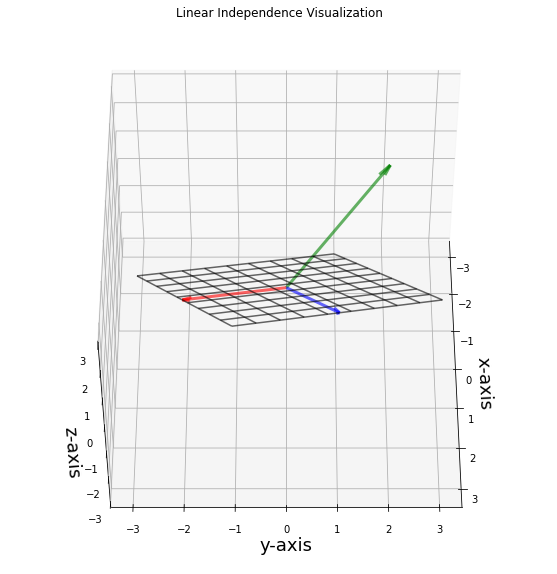

In [5]:
# %matplotlib notebook, use this only when you are in Jupyter Notebook, it doesn't work in Jupyterlab
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = S+2*T
Y = -2*S+T
Z = S+2*T
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)

vec = np.array([[[0, 0, 0, 1, -2, 1]],
               [[0, 0, 0, 2, 1, 2]],
               [[0, 0, 0, -1, 2, 3]]])
colors = ['r','b','g']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

ax.set_title('Linear Independence Visualization')

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=50., azim=0)
plt.show()

Pan around the image (either by setting ```ax.view_init``` or using JupyterLab widget), we can see that the <font face="gotham" color="green">green</font> vector is not in the plane spanned by <font face="gotham" color="red">red</font> and <font face="gotham" color="blue">blue</font> vector, thus they are linearly independent.

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>A Sidenote About Linear Independence</b><br><br>
Let $S = \{{v}_1,{v}_2,{v}_3, ..., {v}_n\}$ be a set of vectors in $\mathbb{R}^m$, if $n>m$, then $S$ is always linearly dependent. Simple example is $4$ vectors in $\mathbb{R}^3$, even if $3$ of them are linearly independent, the $4$th one can never be independent of them. <br><br>

Also if $S = \{{v}_1,{v}_2,{v}_3, ..., {v}_n\}$ contains a zero vector, then the set is always linearly dependent.
</div> 